# Hands-On With Python

## B-J-R-V: The objective of our group is...TBD

*In this walk-through, we will be covering four main techniques to get you comfortable manipulating data with Python.*

#### Background
I'm sure many of you are familiar with the blue and white bikes throughout Pittsburgh which are known to some as "Healthy Rides". Pittsburgh Bike Share, a non-profit located in the Strip District, works to maintain the Healthy Ride bike stations and bikes. The hardware and software is provided by nextbike, which allows Pittsburgh Bike Share to post the data publicly. The dataset can be obtained [here](https://healthyridepgh.com/data/). We will be focusing on the Q2 2017 data, which is already downloaded to this repository. There are two files: `rentals.csv` which provides information on individual rides and `stations.csv` which provides additional information about each bike station.

#### Overview
1. Reading data into a data frame (and previewing it)
2. Selecting/manipulating data
3. Aggregating data
4. Plotting data

At the end, you can try your hand at aggregating and plotting the healthy ride data on your own.

### 1. Reading data into a data frame
Here, we import the pandas package (commonly referred to as "pd").

In [1]:
import pandas as pd
import numpy as np

Next, we read in the rentals.csv file (with the `encoding='latin-1'` parameter) and preview the data using `rentals_df.head()`

In [ ]:
rentals_df = pd.read_csv('rentals.csv', encoding='latin-1')

rentals_df.head()

We can use the `.shape` attribute of the data frame to see the count of records and number of columns.

In [ ]:
rentals_df.shape

In [ ]:
print("There are {} records and {} columns in the rentals.csv file.".format(rentals_df.shape[0], rentals_df.shape[1]))

Also, we can see what data types Python assigned to each column using `rentals_df.dtypes`

In [ ]:
rentals_df.dtypes

### 2. Selecting and manipulating data
Here, we will see how to select, rename and do some basic calculations with data frames.

The data set shows us the trip duration (in seconds), but we would like to see the duration in minutes.

To convert the trip duration from seconds to minutes, we create a new column `Tripduration_mins` by taking the value in `Tripduration` and dividing it by 60. Then we use the `.tail()` method to check the results.

It is important to note that we are **not** looping through each element - the operation of "divide by 60" is applied to each element automatically.

In [ ]:
rentals_df['Tripduration_mins'] = rentals_df['Tripduration'] / 60

rentals_df.tail()

Now, we want to create another column that just has the date of the `Starttime` date time column - so that we can see how many rides occur on a given day.

To do this, we use the `pd.to_datetime` function, which requires a string column and date time format as parameters. We now have a date time object that we can format into any [string format](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) we want.

In [ ]:
# Parse the date time object from a string
rentals_df['Starttime_dt'] = pd.to_datetime(rentals_df['Starttime'], format='%m/%d/%Y %H:%M')

# Format the date time object as a string
rentals_df['Startdate'] = rentals_df['Starttime_dt'].dt.strftime('%m/%d/%Y')

rentals_df.head()

Our data frame is getting a bit crowded. For the purposes of the rest of this analysis, we don't need all of these columns. 

Let's drop a few of the columns we used in calculations and no longer need.

In [ ]:
rentals_df.drop(['Trip id', 'Bikeid', 'Starttime', 'Stoptime', 'Tripduration', 'From station id', 'To station id'], \
                axis=1, inplace=True)

rentals_df.head()

### 3. Aggregating data
Here, we will see how to group data in preparation for plotting.

First, we want to filter the data so that we are only working with rides that occurred in June of 2017.

The syntax to make this happens leverages the date time object we created earlier. To break down what's happening here, first we're identifying which date time objects are greater than 2017-06-01 (which is technically June 1st at 00:00:00) using this snippet `rentals_df['Starttime_dt'] > '2017-06-01'`. This creates a boolean value (True/False) for each record, which is then used to select each record, which is stored as a new data frame called `june_rides`.

In [ ]:
june_rides = rentals_df[rentals_df['Starttime_dt'] > '2017-06-01']
june_rides.head()

Because we would like to create a histogram that visualizes the count of rides per day, we select the `Starttime_dt` column from our `june_rides` data frame. Now we have a data frame with a listing of all of the individual date time objects that represent the start time of each ride in June of 2017.

In [ ]:
june_start_dates = june_rides[['Starttime_dt']]
june_start_dates.head()

In order to get a count of the number of rides that occurred on each day, we use the combination of a `.groupby()` and `.count()` functions. Let's break it down by individual pieces.

First, the snippet 
```python
june_start_dates['Starttime_dt'].dt.date
``` 
parses the date (e.g. 2017-06-01) from the date time object (e.g. 2017-06-01 01:11:00) in the `Starttime_dt` column. This is the value that we will be using to `.groupby()`.

Then, the `.count()` will count up all occurrences of the previously calculated values, which will be stored in the `count_of_rides` data frame.

In [ ]:
count_of_rides = june_start_dates.groupby(june_start_dates['Starttime_dt'].dt.date).count()
count_of_rides.head()

In [ ]:
june_start_dates['Starttime_dt'].dt.dayofweek

### 4. Plotting data
Here, we will see how to plot our prepared data as a histogram.

First, we tell Python that we want to see the plot `inline` by using the magic `%matplotlib inline`.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

We update the index of the `count_of_rides` data frame. Then, by using our aggregated data frame, we simply call the `.plot()` function with the `kind=bar` parameter to visualize the count of rides per date in June of 2017.

In [ ]:
count_of_rides.index.name = 'Ride Start Date'

count_of_rides.plot(kind="bar", title='Frequency of Healthy Rides (June 2017)',figsize=(15,4))

### Try it yourself
We want to figure out what the most popular rides are from Q2 of 2017.

Also, we want to focus on rides which start & stop at ***different*** stations.

Lastly, we are only interested in rides that occurred more than 100 times.

*Hint: One solution leverages the* `.groupby()` *function, the* `.size()` *function, the* `.reset_index()` *function and some tricky filtering techniques.*

**BONUS:** Plot a histogram of each unique from station name in the resulting data frame, with a sum of all originating rides from each station.

*Hint: One solution again leverages the* `.groupby()` *function and the* `.sum()` *function.*

Look at the "solution.png" file in this repository to check your result.

In [ ]:
diff_station_rides=rentals_df[rentals_df['From station name']!=rentals_df['To station name']]
diff_station_rides.head()

In [ ]:
diff_station_rides.shape

In [ ]:
morethan100_rides=diff_station_rides.groupby(['From station name', 'To station name']).count()
morethan100_rides=morethan100_rides.drop(['Tripduration_mins','Starttime_dt','Startdate'],axis=1)
morethan100_rides.columns=['Ride counts']
morethan100_rides=morethan100_rides[morethan100_rides['Ride counts']>100]
morethan100_rides.head(15)

In [ ]:
aggregated_rides=morethan100_rides.groupby(['From station name'])['Ride counts'].sum()
aggregated_rides.head()

In [ ]:
aggregated_rides.plot(kind='bar',figsize=(12,4))

### We are trying to use the &lt;BikeID, TripDuration&gt; data to calculate a probability distribution of bike usage in the city, by bike

In [ ]:
import scipy.stats.kde as sckde
from scipy.stats.kde import gaussian_kde

In [ ]:
from skimage.measure import shannon_entropy
import scipy as sc
from scipy.interpolate import UnivariateSpline

In [ ]:
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
# Entropy of Pandas series
def ent(data):
    """
    Function that computes the entropy of a Pandas series.
    """
    if isinstance(data, np.ndarray):
        _, counts = np.unique(data, return_counts=True)
    else:
        counts = data.value_counts()
    p_data= counts/len(data) # calculates the probabilities
    entropy=sc.stats.entropy(p_data,base=2)  # input probabilities to get the entropy 
    return entropy

In [ ]:
def display_distribution(data, title_, axlabel_):
    """
    Function that takes a Pandas series containing values drawn from a distribution 
    and plots the probability distribution and rug plot
    """
    plt.figure(figsize=(15,6))
    ax=sns.distplot(data, hist=True, rug=True, kde=True, axlabel=axlabel_, \
                 kde_kws={"color": "r", "lw": 3, "label": "KDE"}, \
                 hist_kws={"histtype": "step", "linewidth": 1, \
                           "alpha": 1, "color": "g", "label": "Histogram"})
    plt.title(title_)
    plt.ylabel('Counts')

    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Probability')
    
    summary_text="mean="+str(np.mean(data))+"\nsigma="+str(np.std(data))
    plt.figtext(0.2,0.8,summary_text)

In [20]:
rentals_df = pd.read_csv('rentals.csv', encoding='latin-1')

In [ ]:
rentals_df.drop(['Trip id', 'Starttime', 'Stoptime', 'From station id', 'To station id', 'From station name', \
                 'To station name', 'Usertype'], axis=1, inplace=True)

In [30]:
rentals_df.head()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
0,27193394,4/1/2017 0:59,4/1/2017 1:43,70024,2659,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer
1,27193815,4/1/2017 1:43,4/1/2017 1:48,70353,284,1037,Frew St & Schenley Dr,1038,Boulevard of the Allies & Parkview Ave,Subscriber
2,27194749,4/1/2017 2:35,4/1/2017 3:01,70067,1576,1010,10th St & Penn Ave (David L. Lawrence Conventi...,1010,10th St & Penn Ave (David L. Lawrence Conventi...,Customer
3,27201194,4/1/2017 5:05,4/1/2017 7:46,70191,9695,1005,Forbes Ave & Grant St,1043,Coltart Ave & Forbes Ave,Customer
4,27203670,4/1/2017 5:35,4/1/2017 5:54,70353,1164,1038,Boulevard of the Allies & Parkview Ave,1047,S 22nd St & E Carson St,Subscriber


In [ ]:
grouped_bikes=rentals_df.groupby(['Bikeid']).sum()
grouped_bikes=grouped_bikes.rename(columns={'Tripduration':'TripDurationPerBike'})
grouped_bikes['RentalCountPerBike']=rentals_df.groupby(['Bikeid']).count()

In [ ]:
grouped_bikes.head()

In [ ]:
num_unique_bikes=rentals_df['Bikeid'].unique().shape[0]

In [ ]:
grouped_bikes.sort_values('TripDurationPerBike',ascending=[False])

In [ ]:
p, x = np.histogram(grouped_bikes['TripDurationPerBike'], bins=num_unique_bikes//10)

### Plot the probaboility distributions

In [ ]:
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=num_unique_bikes//10)
plt.plot(x, f(x))
plt.show()

In [ ]:
display_distribution(grouped_bikes['TripDurationPerBike'], \
                     title_="Probability Distribution of Trip Duration in Q3", \
                     axlabel_="Trip Duration in s")

In [ ]:
display_distribution(grouped_bikes['RentalCountPerBike'], \
                     title_="Probability Distribution of Rental Counts in Q3", \
                     axlabel_="Rental Counts")

In [ ]:
## From here forward is the work that we did on 09/1/2017.

In [ ]:
# from boundingbox.klokantech.com, the coordinates of the Pittsburgh bikeshare space:
# With the DublinCore format: westlimit=-80.015745; southlimit=40.414999; 
#     eastlimit=-79.910774; northlimit=40.465952
# With the GEOJSON format: [[[-80.015745163,40.4149990887],[-79.910774231,40.4149990887],
#     [-79.910774231,40.4659518383],[-80.015745163,40.4659518383],[-80.015745163,40.4149990887]]]

In [8]:
pgh_w=-80.015745
pgh_s=40.414999
pgh_e=-79.910774
pgh_n=40.465952
pgh_midx=(pgh_e+pgh_w)/2
pgh_midy=(pgh_n+pgh_s)/2

In [ ]:
# DID NOT WORK: First method- use Matplotlib Basemap to generate the map directly

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm
 
#import mpl_toolkits
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [15]:
m = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc', area_thresh = 0.1,
            lat_0=pgh_midy, lon_0=pgh_midx,
            llcrnrlon=pgh_w, llcrnrlat=pgh_s, urcrnrlon=pgh_e, urcrnrlat=pgh_n)

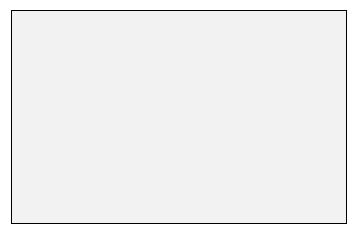

In [16]:
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()

#m.drawcoastlines()
#m.drawcountries()
#m.fillcontinents(color = 'coral')
#m.drawmapboundary()
 
lon = -135.3318
lat = 57.0799
x,y = m(pgh_midy, pgh_midx)
m.plot(x, y, 'bo', markersize=24)
 
plt.show()

In [ ]:
# DID WORK: Second method- use the Google maps API to access the lat/long coordinates for Pittsburgh
# Read Station data, setup Google Maps and call API with center of map as a parameter.
# Examine output in the .html file.

In [2]:
station_df = pd.read_csv('stations.csv', encoding='latin-1')

In [3]:
station_df.head()

,Station #,Station Name,# of Racks,Latitude,Longitude
0,1000,Liberty Ave & Stanwix St,16,40.441326,-80.004679
1,1001,Forbes Ave & Market Square,19,40.440877,-80.003080
2,1002,Third Ave & Wood St,15,40.439030,-80.001860
3,1003,First Ave & Smithfield St (Art Institute),15,40.437200,-80.000375
4,1004,First Ave & B St (T Station),15,40.435887,-79.997102


In [14]:
lats=station_df['Latitude']
longs=station_df['Longitude']

In [29]:
import gmplot

#gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)
gmap = gmplot.GoogleMapPlotter(pgh_midy, pgh_midx, 13)
#gmap = gmplot.from_geocode("Pittsburgh")

gmap.scatter(lats, longs, 'cornflowerblue', edge_width=10)
gmap.scatter(lats, longs, 'red', size=40, marker=False) # other color values: #3B0B39
gmap.heatmap(lats, longs, threshold=20, radius=20, gradient=[(30,30,30,0), (30,30,30,1), (50, 50, 50, 1)])
#gmap.heatmap(lats, longs, threshold=10, radius=10, dissipating=False, \
#              gradient=[(30,30,30,0), (30,30,30,1), (50, 50, 50, 1)])
#gmap.scatter(marker_lats, marker_lngs, 'k', marker=True)
#gmap.heatmap(heat_lats, heat_lngs)

gmap.draw("mymap.html")

In [16]:
station_df.shape

(52, 5)

In [ ]:
# is there a way to display the HTML "inline"? Some sample code from stackexchange

In [11]:
from IPython.core.display import display, HTML
display(HTML('mymap.html'))

In [12]:
display(HTML("<a href='mymap.html' target='_blank'>mymap</a>"))